<a href="https://colab.research.google.com/github/TrishKedi/AI-Coursework/blob/main/ML14_Code01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Hyperparameters
latent_dim = 32
input_dim = 784  # for MNIST
batch_size = 128
epochs = 10

# Build the encoder
encoder_input = tf.keras.Input(shape=(input_dim,))
encoded = layers.Dense(128, activation='relu')(encoder_input)
encoded = layers.Dense(latent_dim, activation='relu')(encoded)
encoder = tf.keras.Model(encoder_input, encoded, name='encoder')

# Build the decoder
decoder_input = tf.keras.Input(shape=(latent_dim,))
decoded = layers.Dense(128, activation='relu')(decoder_input)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)
decoder = tf.keras.Model(decoder_input, decoded, name='decoder')

# Autoencoder = Encoder + Decoder
autoencoder_input = tf.keras.Input(shape=(input_dim,))
encoded_input = encoder(autoencoder_input)
reconstructed = decoder(encoded_input)
autoencoder = tf.keras.Model(autoencoder_input, reconstructed, name='autoencoder')

# Compile and train
autoencoder.compile(optimizer='adam', loss='mse')

# Example with dummy data or real MNIST
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape((-1, 784)) / 255.0
x_test = x_test.reshape((-1, 784)) / 255.0

autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test, x_test))

# Check reconstruction
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0717 - val_loss: 0.0225
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0207 - val_loss: 0.0160
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0159 - val_loss: 0.0139
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0140 - val_loss: 0.0127
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0128 - val_loss: 0.0121
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0122 - val_loss: 0.0114
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0116 - val_loss: 0.0110
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0111 - val_loss: 0.0106
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0106 - val_loss: 0.0102
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0103 - val_loss: 0.0098
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


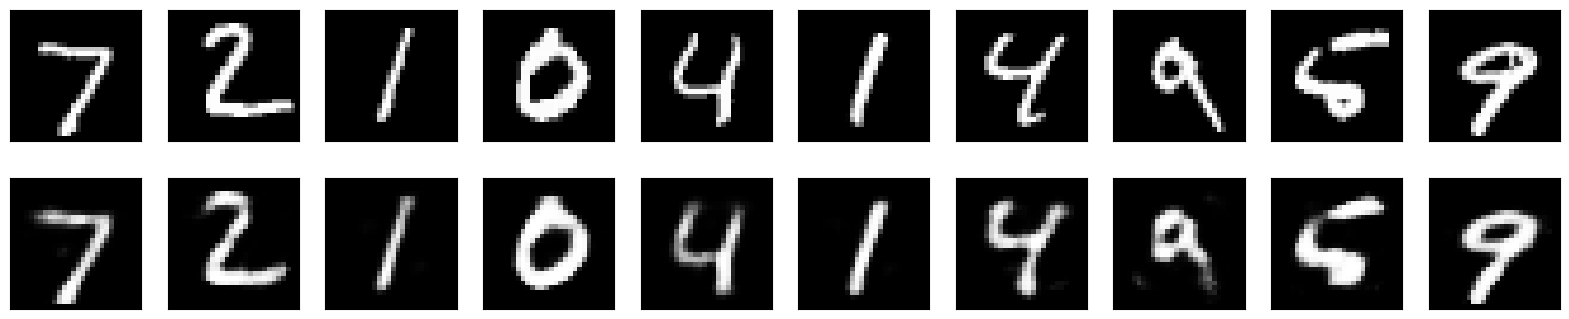

In [ ]:
import matplotlib.pyplot as plt

# Display original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()